In [66]:
import pickle
import numpy as np
from datetime import datetime as dt,timedelta
import sys
sys.path.append('../') # This allows import of lib that is one level up
import lib
from lib.tools import *

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [67]:
years = np.arange(1958,2017,1)
varname = 'H500'
diri = f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/{varname}'
ds = xr.open_mfdataset([f'{diri}/{varname}.{year}.nc' for year in years],engine='netcdf4')
ds = check_lat_order(ds)
ds = ds.drop_vars(['doy','climo'])
lag = 21
ds_lag = ds.shift(time=lag)
ds_lag
dscov = xr.cov(ds['anomaly'], ds_lag['anomaly'], dim="time")


latitudes changed to from S to N


/home/ycheng/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1430: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [72]:
dscov
lon=dscov.lon
lat=dscov.lat
lonPlot = lon.sel(lon=slice(0,360))
latPlot = lat.sel(lat=slice(20,70))
dscov.sel(lon=lonPlot,lat=latPlot)



<xarray.DataArray 'anomaly' (lat: 26, lon: 180)> Size: 37kB
dask.array<getitem, shape=(26, 180), dtype=float64, chunksize=(26, 180), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat      (lat) float64 208B 20.0 22.0 24.0 26.0 28.0 ... 64.0 66.0 68.0 70.0

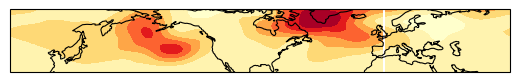

In [73]:
lonW=190
lonE=330
latS=25
latN=70
fig=plt.figure(figsize=(10, 10))
ax1=fig.add_axes([0, 0,0.5,0.25],projection=ccrs.PlateCarree(central_longitude=-90))     
ax1.set_extent([00,360,25,70], crs=ccrs.PlateCarree())
plot1=ax1.contourf(lonPlot,latPlot,dscov.sel(lon=lonPlot,lat=latPlot),transform=ccrs.PlateCarree(),cmap="YlOrRd",extend="min")
# ax1.contour(plot1, colors='k',linewidths=1,transform=ccrs.PlateCarree())
# cbar=plt.colorbar(plot1,ax=ax1,ticks=np.linspace(minCB, maxCB, 11),pad=padN,shrink=0.75)
# cbar.ax.tick_params(labelsize=fsizeN)
ax1.coastlines(resolution='110m',linewidths=0.8)
# ax1.add_feature(cfeature.LAND,color='lightgrey')

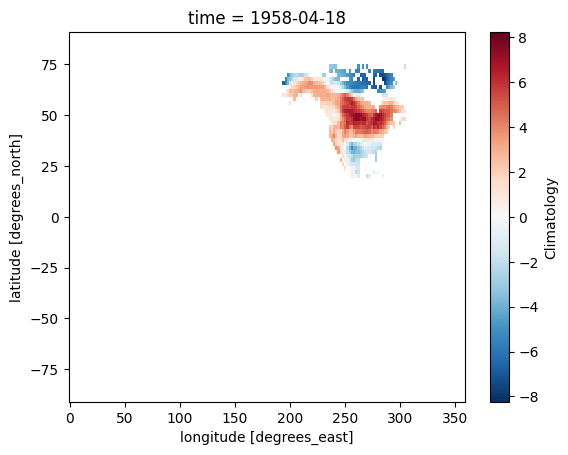

In [31]:
ds['anomaly'].isel(time=100).plot()